In [2]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
matplotlib.rcParams.update({'font.size': 14})

In [3]:
def pos_multi(observers, observer_num, num_organs=4):
    pos_list = []
    for ordx in range(num_organs):
        pos_list.append(((observer_num + 1) / (observers + 1)) + ordx)
    return pos_list

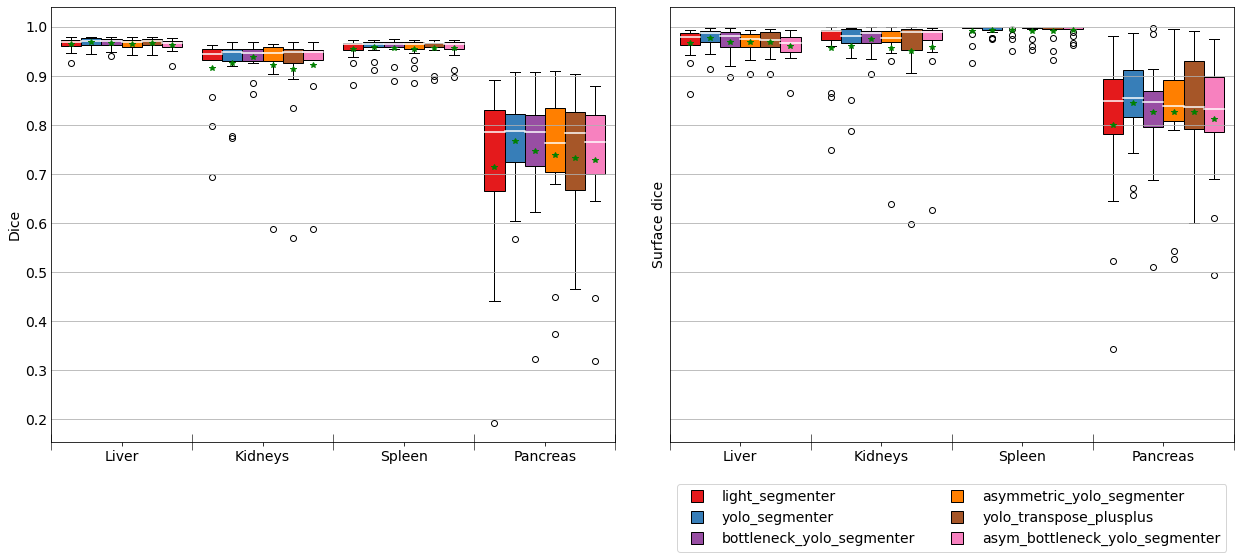

In [7]:
#models = ["light_segmenter", "yolo_segmenter", "bottleneck_yolo_segmenter", "asymmetric_yolo_segmenter", "asym_bottleneck_yolo_segmenter", "bridged_yolo_segmenter","yolo_transpose" , "yolo_transpose_plusplus","yolo_transpose_plusplus_explogloss", "ytp_learnableWL","superres_segmenter", "fullRes_segmenter",]
models = ["light_segmenter","yolo_segmenter", "bottleneck_yolo_segmenter", "asymmetric_yolo_segmenter", "yolo_transpose_plusplus", "asym_bottleneck_yolo_segmenter"]
all_res = np.full((len(models), 16, 4, 2), np.nan)

for mdx, model in enumerate(models):
    all_res[mdx] = np.load(os.path.join("/data/FLARE21/results/", model, "full_res_results_grid.npy"))[0]
fig, (ax0,ax1) = plt.subplots(ncols=2, sharey=True, figsize=(18,8))

num_models = len(models)
organs = ("Liver", "Kidneys", "Spleen", "Pancreas")
#colors = ['xkcd:bright teal', 'xkcd:vibrant green', 'xkcd:fire engine red', 'xkcd:bright yellow', 'xkcd:electric pink', 'xkcd:pumpkin']
cmap = matplotlib.cm.get_cmap('Set1')#'terrain')
colors = [cmap(i/num_models) for i in range(num_models)]

metric_idx = 0
# plot data
bps = []
for mdx in range(num_models):
    locals()[f'bp{mdx}'] = ax0.boxplot([all_res[mdx,:,organ_idx,metric_idx] for organ_idx in range(4)], positions=pos_multi(num_models, mdx), widths=1/(num_models+1), patch_artist=True, zorder=0)
    bps.append(locals()[f'bp{mdx}'])
    ax0.plot(pos_multi(num_models, mdx), [np.nanmean(all_res[mdx, :, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")

# fill colors & median colors
for color_idx, bp in enumerate(bps):
    for patch, line in zip(bp['boxes'], bp['medians']):
        patch.set_facecolor(colors[color_idx]) 
        line.set_color('xkcd:white')
        line.set_linewidth(1.5)

# ticks and labels
ax0.set_xticks([0.5,1.5,2.5,3.5])
ax0.set_xticklabels(organs)
ax0.set_xticks(np.linspace(0,4,5), minor=True)
ax0.tick_params(which='minor', direction='inout', length=16, axis='x')
ax0.tick_params(which='both', direction='inout', length=0, axis='y')
# make some of the ticks invisible
for t in ax0.xaxis.get_ticklines():
    t.set_color((0,0,0,0))
ax0.set_ylabel('Dice')
ax0.set_xlim(0,4)
ax0.grid(which='both', axis='y')

metric_idx = 1
# plot data
bps = []
for mdx in range(num_models):
    locals()[f'bp{mdx}'] = ax1.boxplot([all_res[mdx,:,organ_idx,metric_idx] for organ_idx in range(4)], positions=pos_multi(num_models, mdx), widths=1/(num_models+1), patch_artist=True, zorder=0)
    bps.append(locals()[f'bp{mdx}'])
    ax1.plot(pos_multi(num_models, mdx), [np.nanmean(all_res[mdx, :, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")

# fill colors & median colors
for color_idx, bp in enumerate(bps):
    for patch, line in zip(bp['boxes'], bp['medians']):
        patch.set_facecolor(colors[color_idx]) 
        line.set_color('xkcd:white')
        line.set_linewidth(1.5)

# ticks and labels
ax1.set_xticks([0.5,1.5,2.5,3.5])
ax1.set_xticklabels(organs)
ax1.set_xticks(np.linspace(0,4,5), minor=True)
ax1.tick_params(which='minor', direction='inout', length=16, axis='x')
ax1.tick_params(which='both', direction='inout', length=0, axis='y')
# make some of the ticks invisible
for t in ax1.xaxis.get_ticklines():
    t.set_color((0,0,0,0))
ax1.set_ylabel('Surface dice')
ax1.set_xlim(0,4)
ax1.grid(which='both', axis='y')

m_s = []
for color, label in zip(colors, models):
    m_s.append(mlines.Line2D([],[], mfc=color, mec='k', marker='s', linestyle='None', mew=1, markersize=12.5, label=label))
ax1.legend(handles=m_s, bbox_to_anchor=(0,-1,1,0.92), bbox_transform=ax1.transAxes, loc='upper center', ncol=2)
plt.subplots_adjust(left=0.101, right=0.901, top=0.981, bottom=0.204, wspace=0.2, hspace=0.122)
plt.tight_layout()
plt.show()

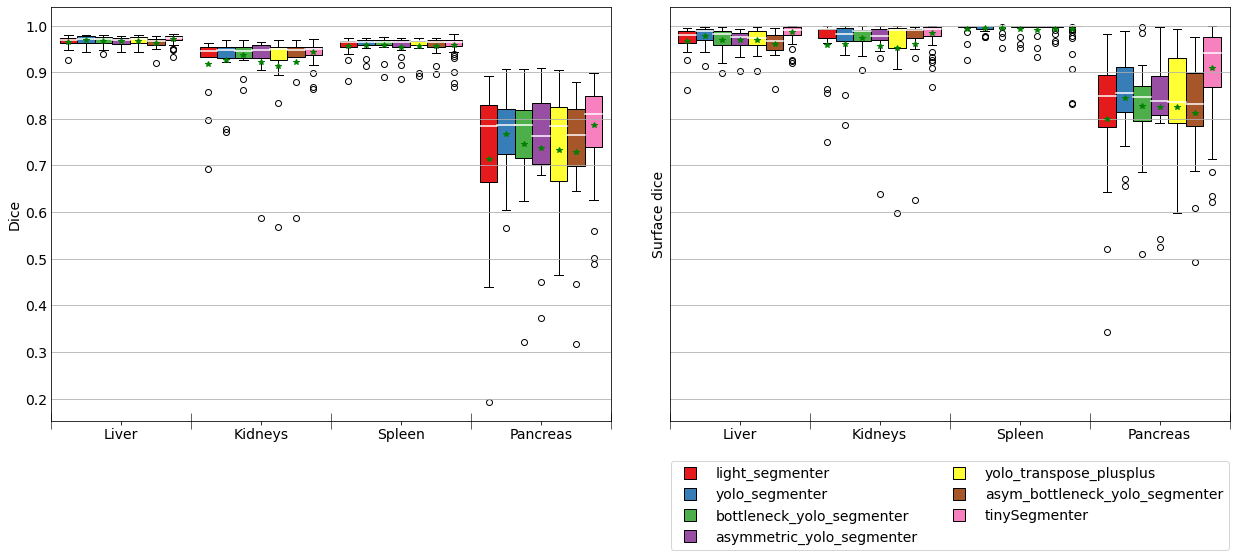

In [8]:
models = ["light_segmenter","yolo_segmenter", "bottleneck_yolo_segmenter", "asymmetric_yolo_segmenter", "yolo_transpose_plusplus", "asym_bottleneck_yolo_segmenter"]
all_res = np.full((len(models), 16, 4, 2), np.nan)

for mdx, model in enumerate(models):
    all_res[mdx] = np.load(os.path.join("/data/FLARE21/results/", model, "full_res_results_grid.npy"))[0]
add_res = np.load(os.path.join("/data/FLARE21/results/", "full_runs/tiny_segmenter_192", "full_res_results_grid.npy"))[0] # "full_runs/yolo_transpose_plusplus"
fig, (ax0,ax1) = plt.subplots(ncols=2, sharey=True, figsize=(18,8))

num_models = len(models)
organs = ("Liver", "Kidneys", "Spleen", "Pancreas")
cmap = matplotlib.cm.get_cmap('Set1')#'terrain')
colors = [cmap(i/(num_models+1)) for i in range(num_models+1)]

metric_idx = 0
# plot data
bps = []
for mdx in range(num_models):
    bps.append(ax0.boxplot([all_res[mdx,:,organ_idx,metric_idx] for organ_idx in range(4)], positions=pos_multi(num_models+1, mdx), widths=1/(num_models+2), patch_artist=True, zorder=0))
    ax0.plot(pos_multi(num_models+1, mdx), [np.nanmean(all_res[mdx, :, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")
bps.append(ax0.boxplot([np.delete(add_res[:,organ_idx,metric_idx], np.argwhere(~(add_res[:,organ_idx,metric_idx]>0))) for organ_idx in range(4)], positions=pos_multi(num_models+1, mdx+1), widths=1/(num_models+2), patch_artist=True, zorder=0))
ax0.plot(pos_multi(num_models+1, mdx+1), [np.nanmean(add_res[:, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")

# fill colors & median colors
for color_idx, bp in enumerate(bps):
    for patch, line in zip(bp['boxes'], bp['medians']):
        patch.set_facecolor(colors[color_idx]) 
        line.set_color('xkcd:white')
        line.set_linewidth(1.5)

# ticks and labels
ax0.set_xticks([0.5,1.5,2.5,3.5])
ax0.set_xticklabels(organs)
ax0.set_xticks(np.linspace(0,4,5), minor=True)
ax0.tick_params(which='minor', direction='inout', length=16, axis='x')
ax0.tick_params(which='both', direction='inout', length=0, axis='y')
# make some of the ticks invisible
for t in ax0.xaxis.get_ticklines():
    t.set_color((0,0,0,0))
ax0.set_ylabel('Dice')
ax0.set_xlim(0,4)
ax0.grid(which='both', axis='y')

metric_idx = 1
# plot data
bps = []
for mdx in range(num_models):
    bps.append(ax1.boxplot([all_res[mdx,:,organ_idx,metric_idx] for organ_idx in range(4)], positions=pos_multi(num_models+1, mdx), widths=1/(num_models+2), patch_artist=True, zorder=0))
    ax1.plot(pos_multi(num_models+1, mdx), [np.nanmean(all_res[mdx, :, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")
bps.append(ax1.boxplot([np.delete(add_res[:,organ_idx,metric_idx], np.argwhere(~(add_res[:,organ_idx,metric_idx]>0))) for organ_idx in range(4)], positions=pos_multi(num_models+1, mdx+1), widths=1/(num_models+2), patch_artist=True, zorder=0))
ax1.plot(pos_multi(num_models+1, mdx+1), [np.nanmean(add_res[:, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")

# fill colors & median colors
for color_idx, bp in enumerate(bps):
    for patch, line in zip(bp['boxes'], bp['medians']):
        patch.set_facecolor(colors[color_idx]) 
        line.set_color('xkcd:white')
        line.set_linewidth(1.5)

# ticks and labels
ax1.set_xticks([0.5,1.5,2.5,3.5])
ax1.set_xticklabels(organs)
ax1.set_xticks(np.linspace(0,4,5), minor=True)
ax1.tick_params(which='minor', direction='inout', length=16, axis='x')
ax1.tick_params(which='both', direction='inout', length=0, axis='y')
# make some of the ticks invisible
for t in ax1.xaxis.get_ticklines():
    t.set_color((0,0,0,0))
ax1.set_ylabel('Surface dice')
ax1.set_xlim(0,4)
ax1.grid(which='both', axis='y')

m_s = []
for color, label in zip(colors, models + ["tinySegmenter"]):
    m_s.append(mlines.Line2D([],[], mfc=color, mec='k', marker='s', linestyle='None', mew=1, markersize=12.5, label=label))
ax1.legend(handles=m_s, bbox_to_anchor=(0,-1,1,0.92), bbox_transform=ax1.transAxes, loc='upper center', ncol=2)
plt.subplots_adjust(left=0.101, right=0.901, top=0.981, bottom=0.204, wspace=0.2, hspace=0.122)
plt.tight_layout()
plt.show()

(3, 361, 4, 2)


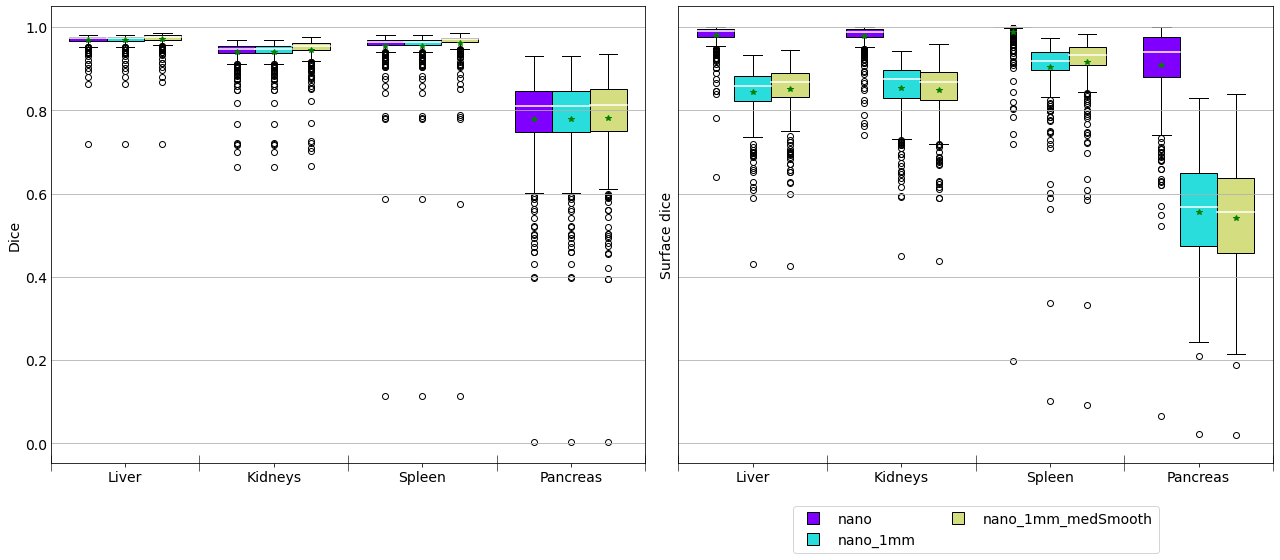

     Liver Kidneys Spleen Pancreas
DSC: 0.973 0.948   0.964  0.809
NSD: 0.859 0.874   0.919  0.567
     Liver Kidneys Spleen Pancreas
DSC: 0.976 0.954   0.970  0.812
NSD: 0.869 0.868   0.933  0.557


In [12]:
#models = ["yolo_transpose_plusplus", "tiny_segmenter_192", "tiny_segmenter_192_donalOutputs", "nano_segmenter_192", "nano_segmenter_192_donalOutputs"]
models = ["nano_segmenter_192", "nano_segmenter_192_1mm", "nano_segmenter_192_1mm_medSmooth"] # "tiny_segmenter_192", "tiny_attention_segmenter_192", 
all_res = np.full((len(models), 361, 4, 2), np.nan)

for mdx, model in enumerate(models):
    #all_res[mdx] = np.load(os.path.join("/data/FLARE21/results/full_runs/", model, "full_res_results_grid.npy"))[0]
    all_res[mdx] = np.load(os.path.join("/data/FLARE21/results/full_runs/", model, "full_res_results_grid.npy")).reshape((5*73, 4, 2))[:-4]
print(all_res.shape)
fig, (ax0,ax1) = plt.subplots(ncols=2, sharey=True, figsize=(18,8))

num_models = len(models)
organs = ("Liver", "Kidneys", "Spleen", "Pancreas")
cmap = matplotlib.cm.get_cmap('rainbow')
colors = [cmap(i/(num_models)) for i in range(num_models)]

metric_idx = 0
# plot data
bps = []
for mdx in range(num_models):
    bps.append(ax0.boxplot([np.delete(all_res[mdx,:,organ_idx,metric_idx], np.argwhere(~(all_res[mdx,:,organ_idx,metric_idx]>0))) for organ_idx in range(4)], positions=pos_multi(num_models, mdx), widths=1/(num_models+1), patch_artist=True, zorder=0))
    ax0.plot(pos_multi(num_models, mdx), [np.nanmean(all_res[mdx, :, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")


# fill colors & median colors
for color_idx, bp in enumerate(bps):
    for patch, line in zip(bp['boxes'], bp['medians']):
        patch.set_facecolor(colors[color_idx]) 
        line.set_color('xkcd:white')
        line.set_linewidth(1.5)

# ticks and labels
ax0.set_xticks([0.5,1.5,2.5,3.5])
ax0.set_xticklabels(organs)
ax0.set_xticks(np.linspace(0,4,5), minor=True)
ax0.tick_params(which='minor', direction='inout', length=16, axis='x')
ax0.tick_params(which='both', direction='inout', length=0, axis='y')
# make some of the ticks invisible
for t in ax0.xaxis.get_ticklines():
    t.set_color((0,0,0,0))
ax0.set_ylabel('Dice')
ax0.set_xlim(0,4)
ax0.grid(which='both', axis='y')

metric_idx = 1
# plot data
bps = []
for mdx in range(num_models):
    bps.append(ax1.boxplot([np.delete(all_res[mdx,:,organ_idx,metric_idx], np.argwhere(~(all_res[mdx,:,organ_idx,metric_idx]>0))) for organ_idx in range(4)], positions=pos_multi(num_models, mdx), widths=1/(num_models+1), patch_artist=True, zorder=0))
    ax1.plot(pos_multi(num_models, mdx), [np.nanmean(all_res[mdx, :, organ_idx, metric_idx]) for organ_idx in range(4)], "g*")

# fill colors & median colors
for color_idx, bp in enumerate(bps):
    for patch, line in zip(bp['boxes'], bp['medians']):
        patch.set_facecolor(colors[color_idx]) 
        line.set_color('xkcd:white')
        line.set_linewidth(1.5)

# ticks and labels
ax1.set_xticks([0.5,1.5,2.5,3.5])
ax1.set_xticklabels(organs)
ax1.set_xticks(np.linspace(0,4,5), minor=True)
ax1.tick_params(which='minor', direction='inout', length=16, axis='x')
ax1.tick_params(which='both', direction='inout', length=0, axis='y')
# make some of the ticks invisible
for t in ax1.xaxis.get_ticklines():
    t.set_color((0,0,0,0))
ax1.set_ylabel('Surface dice')
ax1.set_xlim(0,4)
ax1.grid(which='both', axis='y')

m_s = []
#["ytp_pp", "pytorch tiny", "onnx tiny", "pytorch nano", "onnx nano"]
for color, label in zip(colors, ["nano", "nano_1mm", "nano_1mm_medSmooth"]): #
    m_s.append(mlines.Line2D([],[], mfc=color, mec='k', marker='s', linestyle='None', mew=1, markersize=12.5, label=label))
ax1.legend(handles=m_s, bbox_to_anchor=(0,-1,1,0.92), bbox_transform=ax1.transAxes, loc='upper center', ncol=2)
plt.subplots_adjust(left=0.101, right=0.901, top=0.981, bottom=0.204, wspace=0.2, hspace=0.122)
plt.tight_layout()
plt.show()

mdx = 1
metric_idx = 0
print(f"     {organs[0]} {organs[1]} {organs[2]} {organs[3]}")
print(f"DSC: {np.median(np.delete(all_res[mdx,:,0,metric_idx], np.argwhere(~(all_res[mdx,:,0,metric_idx]>0)))):.3f} {np.median(np.delete(all_res[mdx,:,1,metric_idx], np.argwhere(~(all_res[mdx,:,1,metric_idx]>0)))):.3f}   {np.median(np.delete(all_res[mdx,:,2,metric_idx], np.argwhere(~(all_res[mdx,:,2,metric_idx]>0)))):.3f}  {np.median(np.delete(all_res[mdx,:,3,metric_idx], np.argwhere(~(all_res[mdx,:,3,metric_idx]>0)))):.3f}")
metric_idx = 1
print(f"NSD: {np.median(np.delete(all_res[mdx,:,0,metric_idx], np.argwhere(~(all_res[mdx,:,0,metric_idx]>0)))):.3f} {np.median(np.delete(all_res[mdx,:,1,metric_idx], np.argwhere(~(all_res[mdx,:,1,metric_idx]>0)))):.3f}   {np.median(np.delete(all_res[mdx,:,2,metric_idx], np.argwhere(~(all_res[mdx,:,2,metric_idx]>0)))):.3f}  {np.median(np.delete(all_res[mdx,:,3,metric_idx], np.argwhere(~(all_res[mdx,:,3,metric_idx]>0)))):.3f}") 

mdx = 2
metric_idx = 0
print(f"     {organs[0]} {organs[1]} {organs[2]} {organs[3]}")
#for fold_idx in range(5):
#   print(f"Fold_num: {fold_idx+1}, {np.median(np.delete(all_res[mdx,:,0,metric_idx], np.argwhere(~(all_res[mdx,:,0,metric_idx]>0)))):.3f} {np.median(np.delete(all_res[mdx,:,1,metric_idx], np.argwhere(~(all_res[mdx,:,1,metric_idx]>0)))):.3f} {np.median(np.delete(all_res[mdx,:,2,metric_idx], np.argwhere(~(all_res[mdx,:,2,metric_idx]>0)))):.3f} {np.median(np.delete(all_res[mdx,:,3,metric_idx], np.argwhere(~(all_res[mdx,:,3,metric_idx]>0)))):.3f}")
print(f"DSC: {np.median(np.delete(all_res[mdx,:,0,metric_idx], np.argwhere(~(all_res[mdx,:,0,metric_idx]>0)))):.3f} {np.median(np.delete(all_res[mdx,:,1,metric_idx], np.argwhere(~(all_res[mdx,:,1,metric_idx]>0)))):.3f}   {np.median(np.delete(all_res[mdx,:,2,metric_idx], np.argwhere(~(all_res[mdx,:,2,metric_idx]>0)))):.3f}  {np.median(np.delete(all_res[mdx,:,3,metric_idx], np.argwhere(~(all_res[mdx,:,3,metric_idx]>0)))):.3f}")
metric_idx = 1
print(f"NSD: {np.median(np.delete(all_res[mdx,:,0,metric_idx], np.argwhere(~(all_res[mdx,:,0,metric_idx]>0)))):.3f} {np.median(np.delete(all_res[mdx,:,1,metric_idx], np.argwhere(~(all_res[mdx,:,1,metric_idx]>0)))):.3f}   {np.median(np.delete(all_res[mdx,:,2,metric_idx], np.argwhere(~(all_res[mdx,:,2,metric_idx]>0)))):.3f}  {np.median(np.delete(all_res[mdx,:,3,metric_idx], np.argwhere(~(all_res[mdx,:,3,metric_idx]>0)))):.3f}") 



In [8]:
# Get fold results
res = np.load("/data/FLARE21/results/full_runs/nano_segmenter_192_1mm/full_res_results_grid.npy")
for fdx in range(5):
    if fdx == 1:
        meds = np.round(np.nanmedian(np.delete(res[fdx,:,:,0], 6, 0), axis=0)*100, 1)
        stds = np.round(np.nanstd(np.delete(res[fdx,:,:,0], 6, 0), axis=0)*100, 1)
        meds2 = np.round(np.nanmedian(np.delete(res[fdx,:,:,1], 6, 0), axis=0)*100, 1)
        stds2 = np.round(np.nanstd(np.delete(res[fdx,:,:,1], 6, 0), axis=0)*100, 1)
    else:
        meds = np.round(np.nanmedian(res[fdx,:,:,0], axis=0)*100, 1)
        stds = np.round(np.nanstd(res[fdx,:,:,0], axis=0)*100, 1)
        meds2 = np.round(np.nanmedian(res[fdx,:,:,1], axis=0)*100, 1)
        stds2 = np.round(np.nanstd(res[fdx,:,:,1], axis=0)*100, 1)
    print(f"{meds[0]}$\pm$ {stds[0]} & {meds2[0]}$\pm$ {stds2[0]} & {meds[1]}$\pm$ {stds[1]} & {meds2[1]}$\pm$ {stds2[1]} & {meds[2]}$\pm$ {stds[2]} & {meds2[2]}$\pm$ {stds2[2]} & {meds[3]}$\pm$ {stds[3]} & {meds2[3]}$\pm$ {stds2[3]} \\\\ ")

res = res.reshape((5*73, 4, 2))[:-4]
res = np.delete(res, 79, 0)
meds = np.round(np.nanmedian(res[:,:,0], axis=0)*100, 1)
stds = np.round(np.nanstd(res[:,:,0], axis=0)*100, 1)
meds2 = np.round(np.nanmedian(res[:,:,1], axis=0)*100, 1)
stds2 = np.round(np.nanstd(res[:,:,1], axis=0)*100, 1)
print("median")
print(f"{meds[0]}$\pm$ {stds[0]} & {meds2[0]}$\pm$ {stds2[0]} & {meds[1]}$\pm$ {stds[1]} & {meds2[1]}$\pm$ {stds2[1]} & {meds[2]}$\pm$ {stds[2]} & {meds2[2]}$\pm$ {stds2[2]} & {meds[3]}$\pm$ {stds[3]} & {meds2[3]}$\pm$ {stds2[3]} \\\\ ")


97.3$\pm$ 0.9 & 85.7$\pm$ 4.5 & 94.8$\pm$ 2.2 & 87.1$\pm$ 5.5 & 96.4$\pm$ 2.0 & 91.7$\pm$ 5.3 & 81.5$\pm$ 9.0 & 55.5$\pm$ 11.9 \\ 
97.3$\pm$ 2.1 & 85.8$\pm$ 7.0 & 94.9$\pm$ 4.9 & 88.3$\pm$ 8.2 & 96.5$\pm$ 3.1 & 92.0$\pm$ 6.5 & 81.2$\pm$ 7.3 & 59.9$\pm$ 10.2 \\ 
97.1$\pm$ 1.5 & 84.8$\pm$ 5.9 & 94.6$\pm$ 4.3 & 86.3$\pm$ 7.0 & 96.2$\pm$ 2.7 & 91.9$\pm$ 5.3 & 80.1$\pm$ 13.2 & 54.5$\pm$ 12.6 \\ 
97.1$\pm$ 0.8 & 85.6$\pm$ 5.1 & 94.8$\pm$ 3.6 & 87.0$\pm$ 5.8 & 96.3$\pm$ 1.3 & 92.1$\pm$ 4.5 & 81.0$\pm$ 9.3 & 55.9$\pm$ 13.7 \\ 
97.4$\pm$ 1.0 & 86.7$\pm$ 4.9 & 94.9$\pm$ 1.5 & 88.4$\pm$ 5.4 & 96.3$\pm$ 4.7 & 92.3$\pm$ 8.7 & 80.0$\pm$ 10.4 & 57.6$\pm$ 12.3 \\ 
median
97.3$\pm$ 1.3 & 85.9$\pm$ 5.6 & 94.8$\pm$ 3.6 & 87.5$\pm$ 6.5 & 96.4$\pm$ 3.0 & 92.0$\pm$ 6.3 & 80.9$\pm$ 10.1 & 56.8$\pm$ 12.3 \\ 


In [14]:
from itertools import cycle
import os
import math

def getFiles(targetdir):
    ls = []
    for fname in os.listdir(targetdir):
        path = os.path.join(targetdir, fname)
        if os.path.isdir(path):
            continue
        ls.append(fname)
    return ls

def k_fold_split_train_val_test(dataset_size, fold_num, seed=230597):
    k = int(fold_num-1)
    if dataset_size == 72:
        train_ims, val_ims, test_ims = 48, 8, 16
    else:
        train_ims, val_ims, test_ims = math.floor(dataset_size*0.7), math.floor(dataset_size*0.1), math.ceil(dataset_size*0.2)
        #train_ims, val_ims, test_ims = round(dataset_size*0.7), round(dataset_size*0.1), round(dataset_size*0.2)
        if dataset_size - (train_ims+val_ims+test_ims) == 1:
            val_ims += 1 # put the extra into val set
        try:
            assert(train_ims+val_ims+test_ims == dataset_size)
        except AssertionError:
            print("Check the k fold data splitting, something's dodgy...")
            exit(1)
    train_inds, val_inds, test_inds = [], [], []
    # initial shuffle
    np.random.seed(seed)
    shuffled_ind_list = np.random.permutation(dataset_size)
    # allocate dataset indices based upon the fold number --> not the prettiest or most efficient implementation, but functional
    cyclic_ind_list = cycle(shuffled_ind_list)
    for i in range(k*test_ims):
        next(cyclic_ind_list)   # shift start pos
    for i in range(test_ims):
        test_inds.append(next(cyclic_ind_list))
    for i in range(train_ims):
        train_inds.append(next(cyclic_ind_list))
    for i in range(val_ims):
        val_inds.append(next(cyclic_ind_list))
    return train_inds, val_inds, test_inds

def windowLevelNormalize(image, level, window):
    minval = level - window/2
    maxval = level + window/2
    wld = np.clip(image, minval, maxval)
    wld -= minval
    wld *= (1 / window)
    return wld

In [40]:
# get test fnames
test_im_fnames = []
all_fnames = sorted(getFiles("/data/FLARE21/training_data_192_sameKidneys/scaled_ims/"))
for fold_num in [1,2,3,4,5]:
    _, _, test_inds = k_fold_split_train_val_test(len(all_fnames), fold_num=fold_num, seed=230597)
    test_im_fnames.extend([all_fnames[ind] for ind in test_inds])
test_im_fnames = test_im_fnames[:-4]
# load results
res = np.load(os.path.join("/data/FLARE21/results/full_runs/", "nano_segmenter_192", "full_res_results_grid.npy")).reshape((5*73, 4, 2))[:-4]
# find worst cases
print(f"Worst liver case: {test_im_fnames[np.where(res[:,0,0] < 0.88)[0][0]]}, DSC: {res[np.where(res[:,0,0] < 0.88)[0][0],0,0]:.3f}")
print(f"Worst kidneys case: {test_im_fnames[np.where(res[:,1,0] < 0.7)[0][0]]}, DSC: {res[np.where(res[:,1,0] < 0.7)[0][0],1,0]:.3f}")
print(f"Worst spleen case: {test_im_fnames[np.where(res[:,2,0] < 0.6)[0][-1]]}, DSC: {res[np.where(res[:,2,0] < 0.6)[0][-1],2,0]:.3f}")
print(f"Worst pancreas case: {test_im_fnames[np.where(res[:,3,0] < 0.2)[0][0]]}, DSC: {res[np.where(res[:,3,0] < 0.2)[0][0],3,0]:.3f}")
# find best cases
print(f"Best liver case: {test_im_fnames[np.where(res[:,0,0] > 0.9819)[0][0]]}, DSC: {res[np.where(res[:,0,0] > 0.9819)[0][0],0,0]:.3f}")
print(f"Best kidneys case: {test_im_fnames[np.where(res[:,1,0] > 0.97)[0][0]]}, DSC: {res[np.where(res[:,1,0] > 0.97)[0][0],1,0]:.3f}")
print(f"Best spleen case: {test_im_fnames[np.where(res[:,2,0] > 0.9805)[0][0]]}, DSC: {res[np.where(res[:,2,0] > 0.9805)[0][0],2,0]:.3f}")
print(f"Best pancreas case: {test_im_fnames[np.where(res[:,3,0] > 0.91)[0][0]]}, DSC: {res[np.where(res[:,3,0] > 0.91)[0][0],3,0]:.3f}")


Worst liver case: train_109.npy, DSC: 0.864
Worst kidneys case: train_101.npy, DSC: 0.664
Worst spleen case: train_081.npy, DSC: 0.587
Worst pancreas case: train_078.npy, DSC: 0.003
Best liver case: train_194.npy, DSC: 0.982
Best kidneys case: train_152.npy, DSC: 0.970
Best spleen case: train_199.npy, DSC: 0.981
Best pancreas case: train_241.npy, DSC: 0.930


In [22]:
import SimpleITK as sitk

patient = "train_241.npy"
input_dir = "/data/FLARE21/training_data/TrainingImg/"
mask_dir = "/data/FLARE21/training_data/TrainingMask/"
pred_dir = "/data/FLARE21/results/full_runs/nano_segmenter_192/full_res_test_segs/"

# load ct image, segmentations gold standard and prediction
pred = np.load(os.path.join(pred_dir, "pred_" + patient)).astype(float)
sitk_image = sitk.ReadImage(os.path.join(input_dir, patient.replace('.npy','_0000.nii.gz')))
ct_im = sitk.GetArrayFromImage(sitk_image)
sitk_mask = sitk.ReadImage(os.path.join(mask_dir, patient.replace('.npy','.nii.gz')))
gold_mask = sitk.GetArrayFromImage(sitk_mask).astype(float)
# reorient if required
if sitk_mask.GetDirection()[-1] == -1:
    gold_mask = np.flip(gold_mask, axis=0).copy()
    ct_im = np.flip(ct_im, axis=0).copy()
    gold_mask = np.flip(gold_mask, axis=2).copy() 
    ct_im = np.flip(ct_im, axis=2).copy()
# window and level normalisation for the ct
ct_im = windowLevelNormalize(ct_im, level=50, window=400)
# nan-ise the background for layered plotting
gold_mask[gold_mask<0.05] = np.nan
pred[pred<0.05] = np.nan

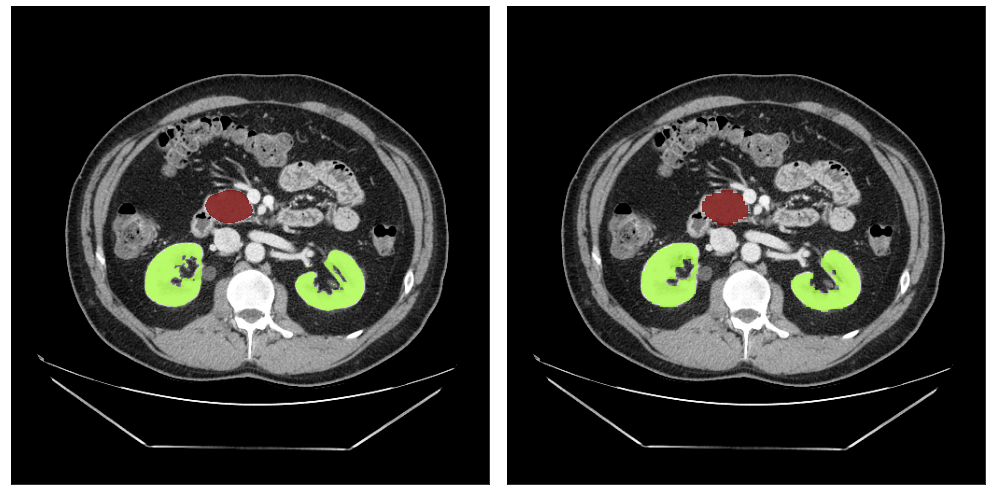

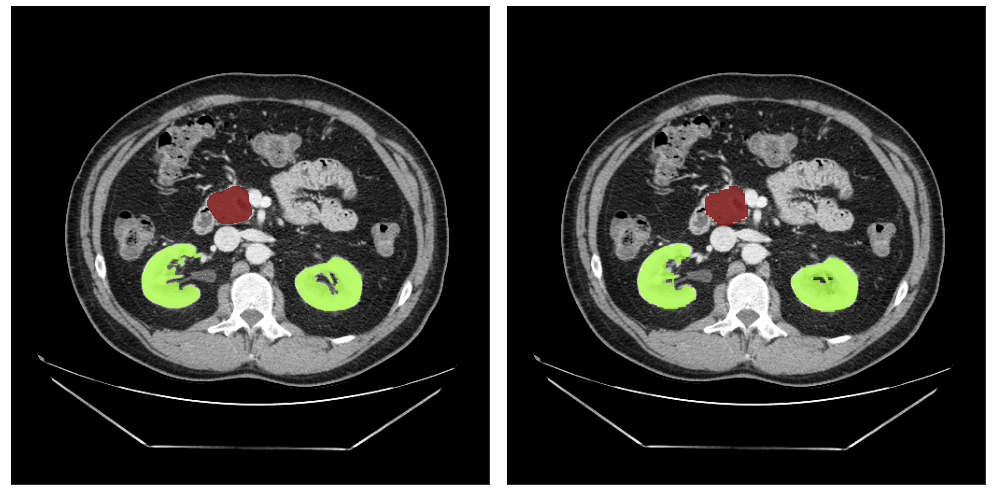

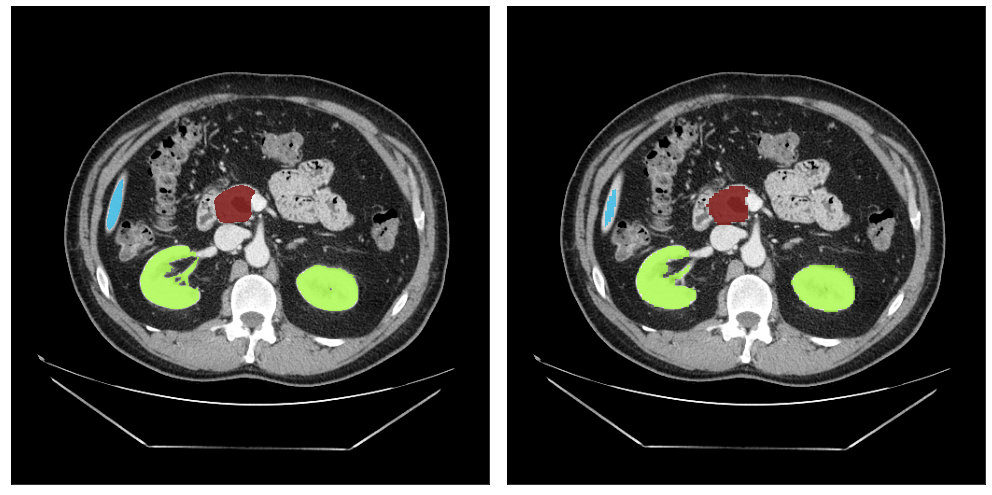

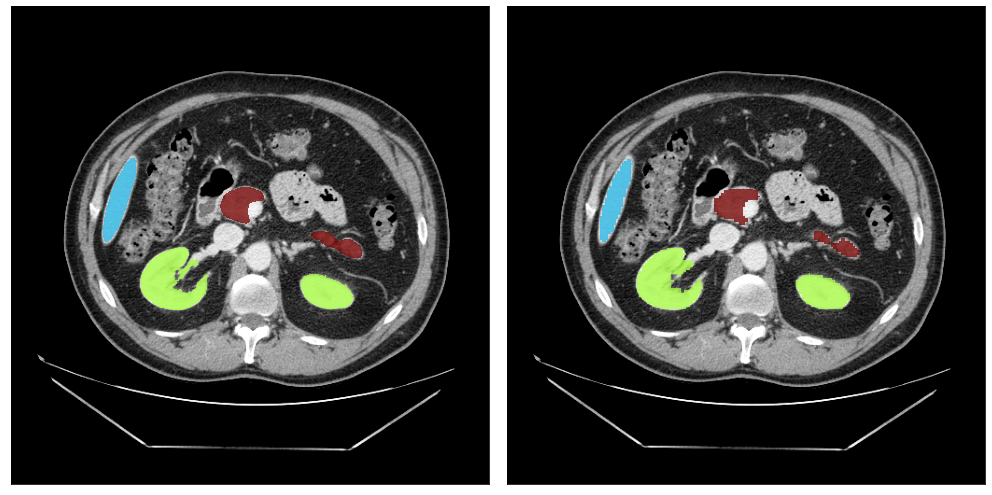

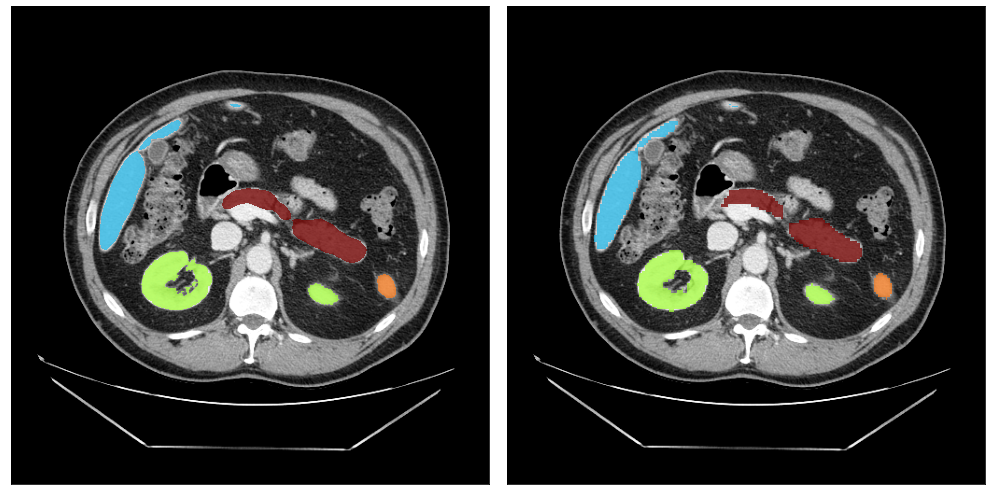

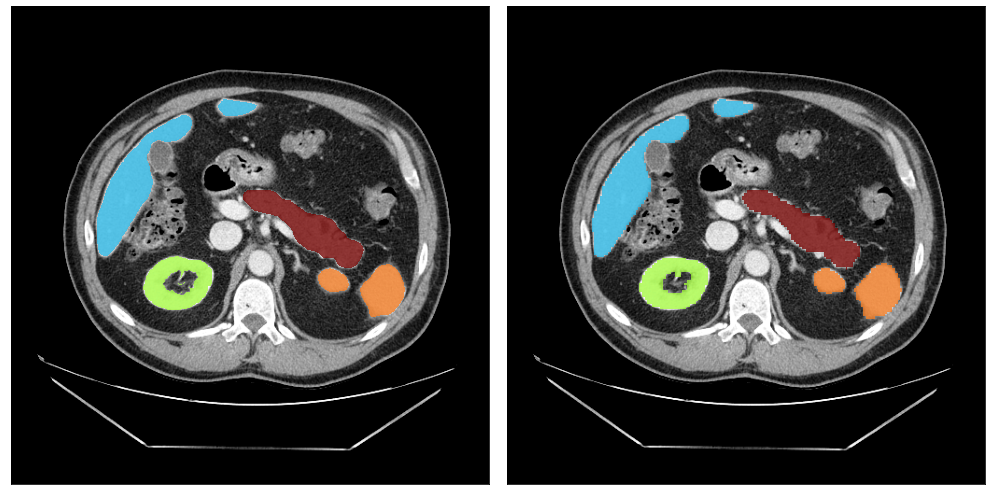

In [26]:
# plotting
for slice_idx in range(40,58,3):
    cmap = "turbo"
    fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(14,8))
    ax0.imshow(np.rot90(ct_im[slice_idx], 2), vmin=np.min(ct_im), vmax=np.max(ct_im), cmap="Greys_r")
    ax0.imshow(np.rot90(gold_mask[slice_idx], 2), vmin=0, vmax=4, cmap=cmap, alpha=0.75)
    ax1.imshow(np.rot90(ct_im[slice_idx], 2), vmin=np.min(ct_im), vmax=np.max(ct_im), cmap="Greys_r")
    ax1.imshow(np.rot90(pred[slice_idx], 2), vmin=0, vmax=4, cmap=cmap, alpha=0.75)
    ax0.set_xticks([])
    ax0.set_yticks([])
    ax1.set_xticks([])
    ax1.set_yticks([])
    plt.tight_layout()
    plt.show()